Training directory contents: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Testing directory contents: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Loading data from:
Training Directory: C:\Users\manik\OneDrive\Desktop\ML DATASET\Brain-Tumor-Classification-DataSet-master\Training
Testing Directory: C:\Users\manik\OneDrive\Desktop\ML DATASET\Brain-Tumor-Classification-DataSet-master\Testing
Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.4497 - loss: 1.4568 - val_accuracy: 0.3490 - val_loss: 1.9421
Epoch 2/10
 1/89 ━━━━━━━━━━━━━━━━━━━━ 38s 440ms/step - accuracy: 0.6562 - loss: 0.7559

C:\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6562 - loss: 0.7559 - val_accuracy: 0.7000 - val_loss: 1.2044
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 53s 573ms/step - accuracy: 0.7766 - loss: 0.5692 - val_accuracy: 0.5026 - val_loss: 2.3134
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.3899 - val_accuracy: 0.7000 - val_loss: 0.6995
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 530ms/step - accuracy: 0.8516 - loss: 0.3523 - val_accuracy: 0.5964 - val_loss: 2.4652
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.4250 - val_accuracy: 0.8000 - val_loss: 0.3782
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 49s 532ms/step - accuracy: 0.9286 - loss: 0.1982 - val_accuracy: 0.6719 - val_loss: 2.9140
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0656 - val_accuracy: 0.8000 - val_loss: 0.3708
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 48s 521ms/step - accuracy: 0.9552 - loss: 0.1249 - val_accuracy: 0.6354 - val_loss

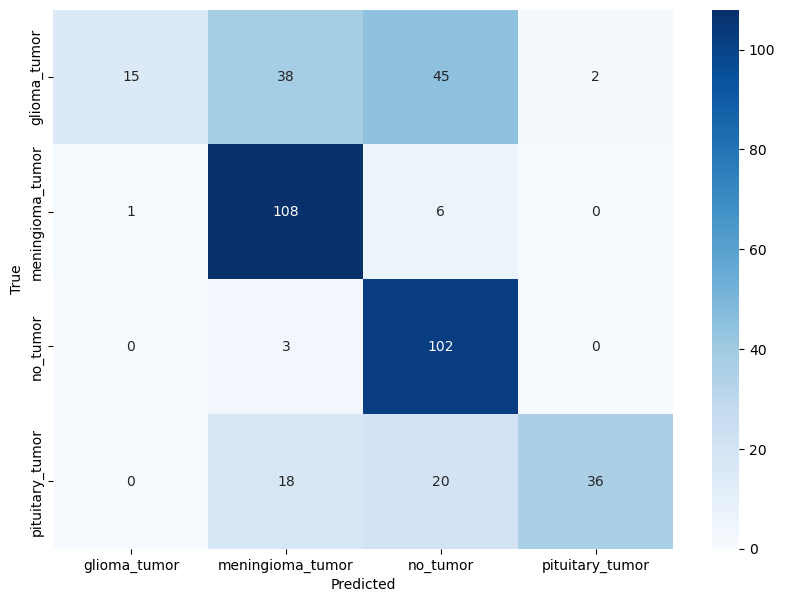

In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Paths to the ZIP file and the extracted dataset folder
zip_file_path = r"C:\Users\manik\OneDrive\Desktop\ML DATASET.zip"
extract_to_path = r"C:\Users\manik\OneDrive\Desktop\ML DATASET"

# Set the correct path for the training and testing directories
train_dir = os.path.join(extract_to_path, "Brain-Tumor-Classification-DataSet-master", "Training")
test_dir = os.path.join(extract_to_path, "Brain-Tumor-Classification-DataSet-master", "Testing")

# Check if the ZIP file exists
if not os.path.exists(zip_file_path):
    raise FileNotFoundError(f"ZIP file not found: {zip_file_path}")

# Check if the dataset directory exists, if not, extract the ZIP file
if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    print(f"Extracting dataset from {zip_file_path}...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
    print("Extraction complete.")

# Debugging: Check the extracted directory structure
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")
print(f"Training directory contents: {os.listdir(train_dir)}")

if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Testing directory not found: {test_dir}")
print(f"Testing directory contents: {os.listdir(test_dir)}")

print(f"Loading data from:\nTraining Directory: {train_dir}\nTesting Directory: {test_dir}")

# Image data generator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Load and preprocess testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Build a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Predict on the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Classification Report
class_report = classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys()))

print("Confusion Matrix")
print(cm)

print("\nClassification Report")
print(class_report)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_generator.class_indices.keys()), yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Replace these arrays with your actual data
y_true = np.array([100, 200, 300, 400, 500])  # Ground truth (actual prices)
y_pred = np.array([90, 210, 305, 390, 510])   # Model predictions

# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)

# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 3. Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_true, y_pred)

# 4. R² Score (Coefficient of Determination)
r2 = r2_score(y_true, y_pred)

# Display results
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R² Score: {r2}")


MSE: 85.0
RMSE: 9.219544457292887
MAPE: 0.042333333333333334
R² Score: 0.99575


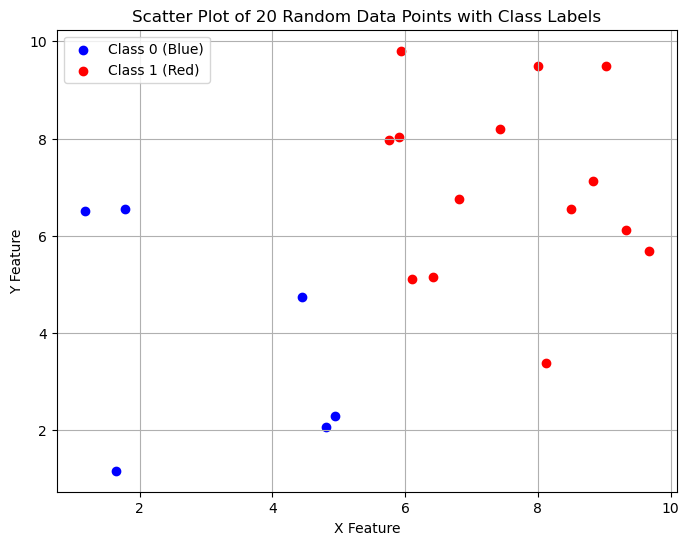

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate 20 random data points (X and Y) between 1 and 10
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Assign classes based on a random condition (e.g., sum of X and Y > 10 belongs to class 1)
classes = np.where(X + Y > 10, 1, 0)

# Create the scatter plot
plt.figure(figsize=(8, 6))

# Plot class 0 (Blue)
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0 (Blue)')

# Plot class 1 (Red)
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')

# Label the plot
plt.title('Scatter Plot of 20 Random Data Points with Class Labels')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


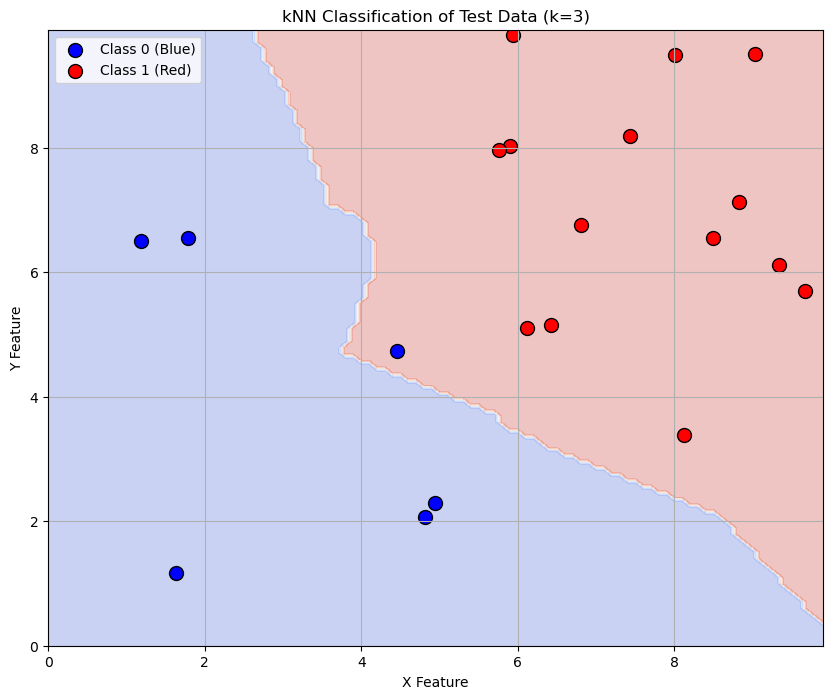

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate training data (same as before)
np.random.seed(0)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)

# Assign classes based on sum of X and Y (or other criteria)
train_classes = np.where(X_train + Y_train > 10, 1, 0)

# Combine X and Y into a single training data matrix
train_data = np.column_stack((X_train, Y_train))

# Generate test data with values of X and Y between 0 and 10 with 0.1 increments (100x100 grid)
x_test = np.arange(0, 10, 0.1)
y_test = np.arange(0, 10, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)

# Reshape the test data to be a 2D array of points (10,000 points)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

# Create kNN classifier (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train kNN on the training data
knn.fit(train_data, train_classes)

# Classify test data points
test_classes = knn.predict(test_data)

# Reshape test_classes back to match the shape of the grid (100x100)
test_classes = test_classes.reshape(X_test.shape)

# Plot the test data points colored by predicted class
plt.figure(figsize=(10, 8))

# Plot test data points for class 0 (blue)
plt.contourf(X_test, Y_test, test_classes, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot the training data points
plt.scatter(X_train[train_classes == 0], Y_train[train_classes == 0], color='blue', label='Class 0 (Blue)', edgecolor='k', s=100)
plt.scatter(X_train[train_classes == 1], Y_train[train_classes == 1], color='red', label='Class 1 (Red)', edgecolor='k', s=100)

# Add labels and title
plt.title('kNN Classification of Test Data (k=3)')
plt.xlabel('X Feature')
plt.ylabel('Y Feature')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


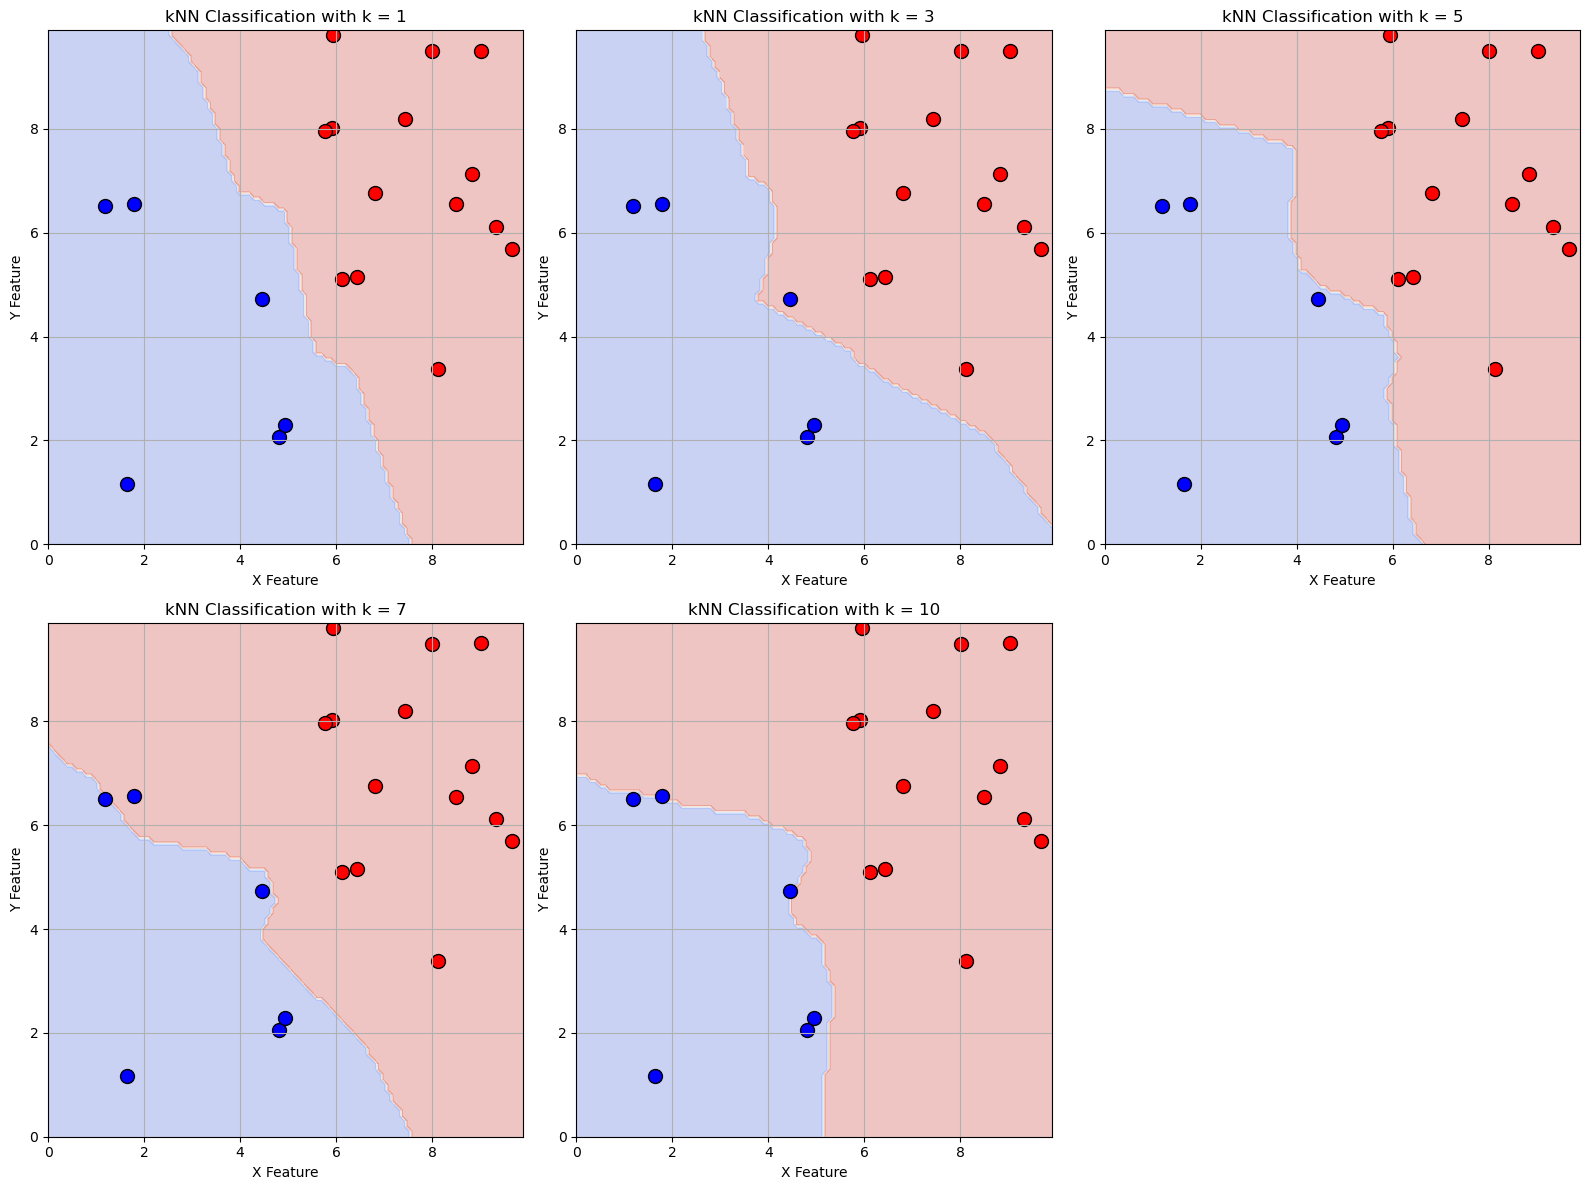

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate training data (same as before)
np.random.seed(0)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)
train_classes = np.where(X_train + Y_train > 10, 1, 0)
train_data = np.column_stack((X_train, Y_train))

# Generate test data with values of X and Y between 0 and 10 with 0.1 increments (100x100 grid)
x_test = np.arange(0, 10, 0.1)
y_test = np.arange(0, 10, 0.1)
X_test, Y_test = np.meshgrid(x_test, y_test)
test_data = np.column_stack((X_test.ravel(), Y_test.ravel()))

# List of different k values to observe changes in class boundaries
k_values = [1, 3, 5, 7, 10]

# Set up the plot layout
plt.figure(figsize=(16, 12))

# Loop over different k values and plot the decision boundaries
for idx, k in enumerate(k_values):
    # Create kNN classifier with different values of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the kNN classifier
    knn.fit(train_data, train_classes)
    
    # Predict the class for each test data point
    test_classes = knn.predict(test_data)
    
    # Reshape the predicted classes to match the grid shape (100x100)
    test_classes = test_classes.reshape(X_test.shape)
    
    # Create subplot for each k value
    plt.subplot(2, 3, idx + 1)
    
    # Plot the decision boundaries for test data points
    plt.contourf(X_test, Y_test, test_classes, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot training data points
    plt.scatter(X_train[train_classes == 0], Y_train[train_classes == 0], color='blue', label='Class 0 (Blue)', edgecolor='k', s=100)
    plt.scatter(X_train[train_classes == 1], Y_train[train_classes == 1], color='red', label='Class 1 (Red)', edgecolor='k', s=100)
    
    # Set plot title and labels
    plt.title(f'kNN Classification with k = {k}')
    plt.xlabel('X Feature')
    plt.ylabel('Y Feature')
    plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


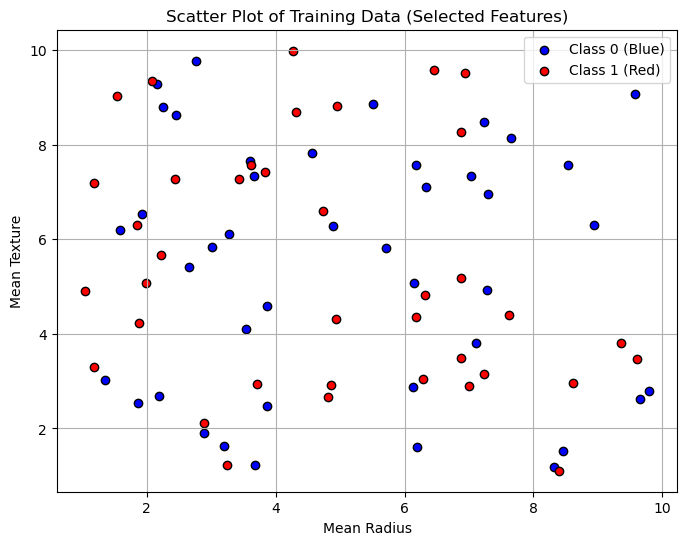

In [6]:
#A6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming the dataset is already loaded and processed into Pandas DataFrame
# For demonstration, we'll create a dummy dataset (replace this with your actual data loading)
# Replace `df` with your actual dataframe containing the features and classes
df = pd.DataFrame({
    'mean_radius': np.random.uniform(1, 10, 100),  # Feature 1
    'mean_texture': np.random.uniform(1, 10, 100),  # Feature 2
    'class': np.random.choice([0, 1], size=100)  # Binary classes: 0 and 1
})

# Select two features and class label
X = df[['mean_radius', 'mean_texture']].values  # Two features
y = df['class'].values  # Class labels

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Plot Training Data ###
plt.figure(figsize=(8, 6))

# Plot training data points by class
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Blue)', edgecolor='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1 (Red)', edgecolor='k')

# Label the plot
plt.title('Scatter Plot of Training Data (Selected Features)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.grid(True)
plt.show()


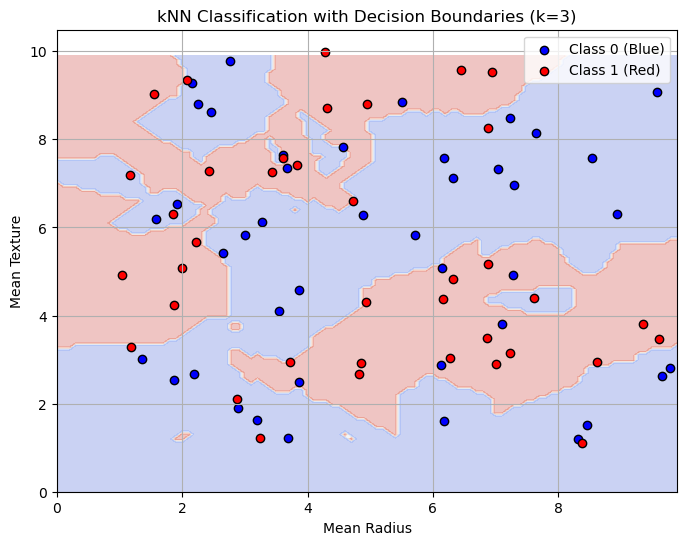

In [7]:
#A6
# Create test data with values of X and Y (mean_radius and mean_texture) between 0 and 10
x_test = np.arange(0, 10, 0.1)
y_test = np.arange(0, 10, 0.1)
X_test_mesh, Y_test_mesh = np.meshgrid(x_test, y_test)

# Reshape test data to be a 2D array of points
test_data = np.column_stack((X_test_mesh.ravel(), Y_test_mesh.ravel()))

# Train a kNN classifier (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Classify test data points
test_classes = knn.predict(test_data)

# Reshape test_classes back to match the grid shape
test_classes = test_classes.reshape(X_test_mesh.shape)

### Step 4: Plot Test Data and Decision Boundaries ###
plt.figure(figsize=(8, 6))

# Plot the decision boundaries for the test data points
plt.contourf(X_test_mesh, Y_test_mesh, test_classes, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot training data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Blue)', edgecolor='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1 (Red)', edgecolor='k')

# Label the plot
plt.title('kNN Classification with Decision Boundaries (k=3)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.grid(True)
plt.show()


Performing GridSearchCV...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters from GridSearchCV: {'n_neighbors': 11, 'weights': 'uniform'}
Best Cross-validation Score from GridSearchCV: 0.525
Test Set Accuracy from GridSearchCV: 0.45
Performing RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from RandomizedSearchCV: {'n_neighbors': 11, 'weights': 'uniform'}
Best Cross-validation Score from RandomizedSearchCV: 0.525
Test Set Accuracy from RandomizedSearchCV: 0.45


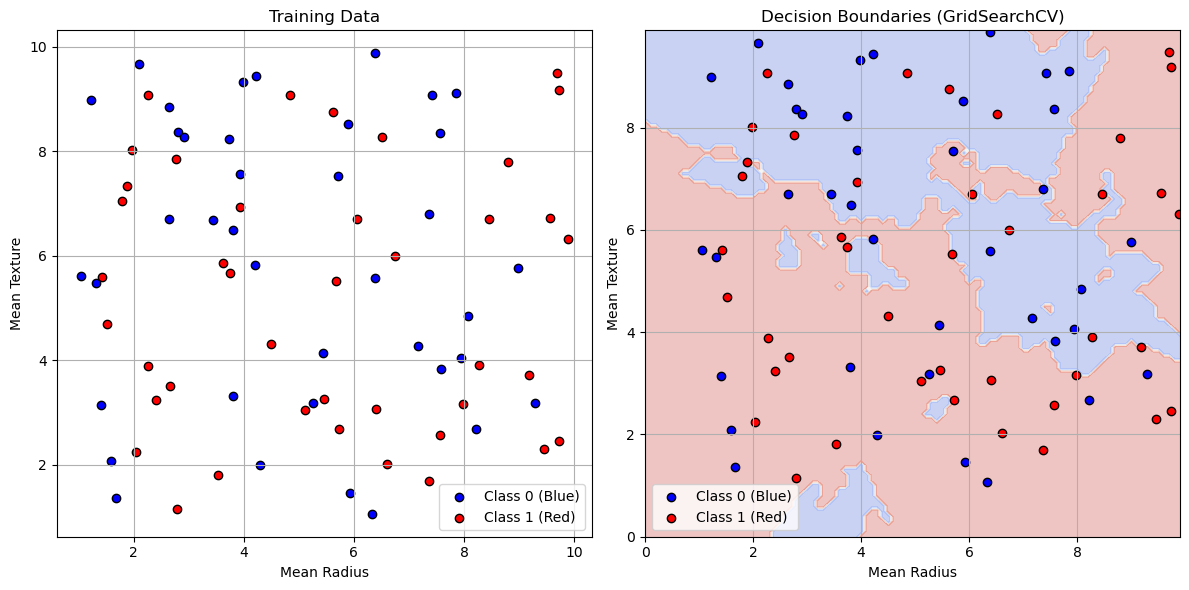

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Generate synthetic dataset
np.random.seed(42)
df = pd.DataFrame({
    'mean_radius': np.random.uniform(1, 10, 100),  # Feature 1
    'mean_texture': np.random.uniform(1, 10, 100),  # Feature 2
    'class': np.random.choice([0, 1], size=100)  # Binary classes: 0 and 1
})

# Prepare features and labels
X = df[['mean_radius', 'mean_texture']].values
y = df['class'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Test k values from 1 to 20
    'weights': ['uniform', 'distance']  # Test different weight options
}

# Create a kNN classifier
knn = KNeighborsClassifier()

# GridSearchCV
print("Performing GridSearchCV...")
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Cross-validation Score from GridSearchCV:", grid_search.best_score_)

# Evaluate the best model from GridSearchCV on the test set
best_knn_grid = grid_search.best_estimator_
y_pred_grid = best_knn_grid.predict(X_test)
print("Test Set Accuracy from GridSearchCV:", accuracy_score(y_test, y_pred_grid))

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_neighbors': randint(1, 21),  # Randomly select k values from 1 to 20
    'weights': ['uniform', 'distance']  # Test different weight options
}

# RandomizedSearchCV
print("Performing RandomizedSearchCV...")
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters from RandomizedSearchCV:", random_search.best_params_)
print("Best Cross-validation Score from RandomizedSearchCV:", random_search.best_score_)

# Evaluate the best model from RandomizedSearchCV on the test set
best_knn_random = random_search.best_estimator_
y_pred_random = best_knn_random.predict(X_test)
print("Test Set Accuracy from RandomizedSearchCV:", accuracy_score(y_test, y_pred_random))

# Plot training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Blue)', edgecolor='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1 (Red)', edgecolor='k')
plt.title('Training Data')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.grid(True)

# Generate mesh for decision boundary plotting
x_test = np.arange(0, 10, 0.1)
y_test = np.arange(0, 10, 0.1)
X_test_mesh, Y_test_mesh = np.meshgrid(x_test, y_test)
test_data = np.column_stack((X_test_mesh.ravel(), Y_test_mesh.ravel()))

# Plot decision boundaries for the best model from GridSearchCV
plt.subplot(1, 2, 2)
test_classes_grid = grid_search.best_estimator_.predict(test_data).reshape(X_test_mesh.shape)
plt.contourf(X_test_mesh, Y_test_mesh, test_classes_grid, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 0 (Blue)', edgecolor='k')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 1 (Red)', edgecolor='k')
plt.title('Decision Boundaries (GridSearchCV)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
